In [1]:
#dataset
#https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running/discussion/420633

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("ultramarathon_data.csv")

C:\Users\pedro\AppData\Local\Temp\ipykernel_5420\2350612576.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("TWO_CENTURIES_OF_UM_RACES.csv")


In [4]:
df.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
5,2018,06.01.2018,Selva Costera (CHI),50km,22,6:25:01 h,NaN,ARG,1974.0,M,M40,7.792,5
6,2018,06.01.2018,Selva Costera (CHI),50km,22,6:28:00 h,Los Patagones,ARG,1979.0,F,W35,7.732,6
7,2018,06.01.2018,Selva Costera (CHI),50km,22,6:32:24 h,Reaktiva Chile,CHI,1967.0,F,W50,7.645,7
8,2018,06.01.2018,Selva Costera (CHI),50km,22,6:39:08 h,Puro Trail Osorno,CHI,1985.0,M,M23,7.516,8
9,2018,06.01.2018,Selva Costera (CHI),50km,22,6:45:11 h,Marlene Flores Team,CHI,1976.0,M,M40,7.404,9


In [5]:
df.shape

(7461195, 13)

In [6]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [7]:
# cleaning data
# only USA races, 50km or 50mi, 2022

In [8]:
#creating a new column with the countries acronyms

In [9]:
df['country'] = df['Event name'].apply(lambda x: x.split('(')[1].split(')')[0])

In [10]:
#updating the df to contain only USA races

In [11]:
df = df[df['country'] == 'USA']
df['country'].unique()

array(['USA'], dtype=object)

In [12]:
# updating the df to contain only 2022 races

In [13]:
df = df[df['Year of event'] == 2022]
df['Year of event'].unique()

array([2022], dtype=int64)

In [14]:
# updating the df to contain only 50kh or 50mi races with isin func

In [15]:
df = df[df['Event distance/length'].isin(['50km', '50mi'])]
df['Event distance/length'].unique()

array(['50mi', '50km'], dtype=object)

In [16]:
df.shape

(58600, 14)

In [17]:
# remove the country acronym (USA) from the event names

In [18]:
df['Event name'] = df['Event name'].apply(lambda x: x.split('(')[0])

In [19]:
# creating a new column 'athlete age'

In [20]:
df['athlete_age'] = df['Year of event'] - df['Athlete year of birth']

In [21]:
# removing the 'h' sulfix from the columns 'athlete performance'

In [22]:
df['Athlete performance'] = df['Athlete performance'].apply(lambda x: x.split(' ')[0])

In [23]:
# drop some columns: 'athlete club', 'athlete country', 'athlete year of birth', 'athlete age category'

In [24]:
df = df.drop(['Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'], axis='columns')

In [25]:
df.columns

Index(['Year of event', 'Event dates', 'Event name', 'Event distance/length',
       'Event number of finishers', 'Athlete performance', 'Athlete gender',
       'Athlete average speed', 'Athlete ID', 'country', 'athlete_age'],
      dtype='object')

In [26]:
# cleaning null values

In [27]:
df.isna().sum()

Year of event                   0
Event dates                     0
Event name                      0
Event distance/length           0
Event number of finishers       0
Athlete performance             0
Athlete gender                  0
Athlete average speed           0
Athlete ID                      0
country                         0
athlete_age                  1788
dtype: int64

In [28]:
df = df.dropna()
df.shape

(56812, 11)

In [29]:
# check for duplicates

In [30]:
df[df.duplicated()]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,country,athlete_age


In [31]:
# reset the index

In [32]:
df.reset_index(drop = True)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,country,athlete_age
0,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,7:53:36,M,10.194,839364,USA,28.0
1,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:14:24,M,9.765,366598,USA,32.0
2,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:19:16,M,9.67,553476,USA,43.0
3,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:23:49,M,9.583,807555,USA,28.0
4,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:41:37,M,9.256,947348,USA,25.0
...,...,...,...,...,...,...,...,...,...,...,...
56807,2022,16.10.2022,Tussey Mountainback 50 Miler,50mi,35,11:16:08,M,7.141,1044739,USA,54.0
56808,2022,16.10.2022,Tussey Mountainback 50 Miler,50mi,35,11:27:05,M,7.027,50971,USA,63.0
56809,2022,16.10.2022,Tussey Mountainback 50 Miler,50mi,35,11:46:34,F,6.833,73152,USA,67.0
56810,2022,16.10.2022,Tussey Mountainback 50 Miler,50mi,35,11:55:29,M,6.748,970133,USA,57.0


In [33]:
# fix data types

In [34]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed         object
Athlete ID                     int64
country                       object
athlete_age                  float64
dtype: object

In [35]:
# transforming float datatype into int in 'athlete_age' column

In [36]:
df['athlete_age'] = df['athlete_age'].astype(int)

In [37]:
# transforming object datatype into float in 'Athlete average speed' column

In [38]:
df['Athlete average speed'] = df['Athlete average speed'].astype(float)

In [39]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
country                       object
athlete_age                    int32
dtype: object

In [40]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,country,athlete_age
3138208,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,7:53:36,M,10.194,839364,USA,28
3138209,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:14:24,M,9.765,366598,USA,32
3138210,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:19:16,M,9.670,553476,USA,43
3138211,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:23:49,M,9.583,807555,USA,28
3138212,2022,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,8:41:37,M,9.256,947348,USA,25


In [41]:
# rename columns

In [42]:
# formating all current column names to lower case and replacing spaces with underscore

In [43]:
for column_name in df.columns:
    new_col_name = column_name.lower().replace(' ', '_')
    df = df.rename(columns = {column_name: new_col_name})
df.columns

Index(['year_of_event', 'event_dates', 'event_name', 'event_distance/length',
       'event_number_of_finishers', 'athlete_performance', 'athlete_gender',
       'athlete_average_speed', 'athlete_id', 'country', 'athlete_age'],
      dtype='object')

In [44]:
# renaming some columns

In [45]:
df = df.rename(columns = {'year_of_event': 'year',
                          'event_dates': 'race_date',
                          'event_name': 'race_name',
                          'event_distance/length': 'race_length',
                          'event_number_of_finishers': 'race_number_of_finishers'})
df.columns

Index(['year', 'race_date', 'race_name', 'race_length',
       'race_number_of_finishers', 'athlete_performance', 'athlete_gender',
       'athlete_average_speed', 'athlete_id', 'country', 'athlete_age'],
      dtype='object')

In [46]:
# reorder columns

In [47]:
df = df[['race_date', 
         'race_name', 
         'race_length', 
         'race_number_of_finishers', 
         'athlete_id', 'athlete_gender', 
         'athlete_age', 
         'athlete_performance', 
         'athlete_average_speed',
         'country',
         'year']]

In [48]:
df.head()

,race_date,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed,country,year
3138208,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,839364,M,28,7:53:36,10.194,USA,2022
3138209,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,366598,M,32,8:14:24,9.765,USA,2022
3138210,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,553476,M,43,8:19:16,9.670,USA,2022
3138211,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,807555,M,28,8:23:49,9.583,USA,2022
3138212,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,947348,M,25,8:41:37,9.256,USA,2022


In [49]:
# droping some more columns:

In [50]:
df = df.drop(['country', 'year'], axis='columns')
df.head()

,race_date,race_name,race_length,race_number_of_finishers,athlete_id,athlete_gender,athlete_age,athlete_performance,athlete_average_speed
3138208,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,839364,M,28,7:53:36,10.194
3138209,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,366598,M,32,8:14:24,9.765
3138210,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,553476,M,43,8:19:16,9.670
3138211,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,807555,M,28,8:23:49,9.583
3138212,12.03.2022,Bel Monte 50 Mile Endurance Run,50mi,49,947348,M,25,8:41:37,9.256


In [51]:
# analysis, charts and graphs

In [52]:
# see the proportion beetween 50 miles races and 50km races

C:\Users\pedro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='race_length', ylabel='Count'>

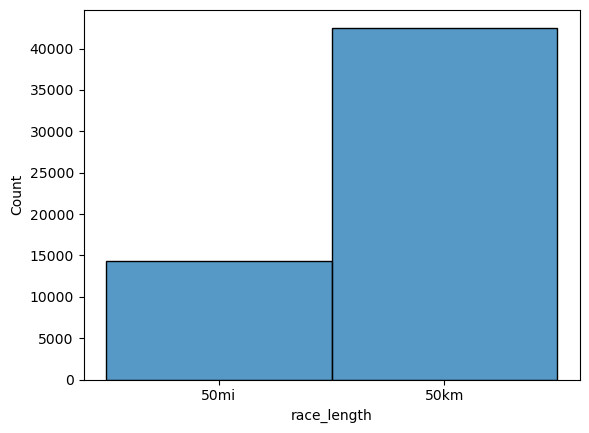

In [53]:
sns.histplot(df['race_length'])

In [54]:
mi = len(df[df['race_length'] == '50mi'])
km = len(df[df['race_length'] == '50km'])
km_mi_ratio = km/mi
km_mi_ratio

2.9775957431912063

In [55]:
# we can notice that we have nearly 3 50km ultramaron for each 50mi ultramaraton, with a ratio of 2.97
# maybe because 50 miles races are harder than 50km ones.

In [56]:
# cleaning 'X' values in 'athlete_gender' column

In [57]:
df = df[df['athlete_gender'] != 'X']

In [58]:
# see the proportion between men and women in each race length

C:\Users\pedro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='race_length', ylabel='Count'>

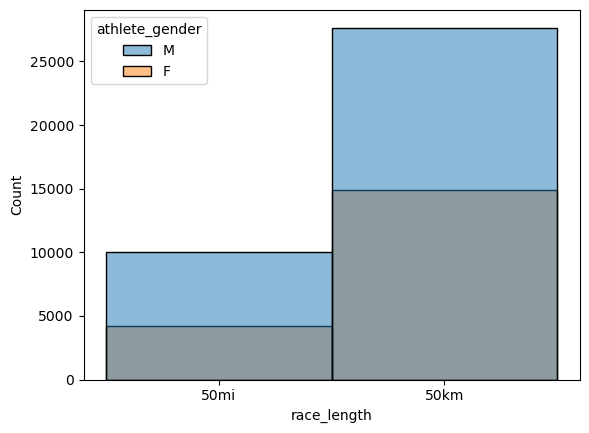

In [59]:
sns.histplot(df, x='race_length', hue ='athlete_gender')

In [60]:
# calculating the percentage for each gender in each race length

km_m = len(df[(df['race_length'] == '50km') & (df['athlete_gender'] == 'M')])
km_f = len(df[(df['race_length'] == '50km') & (df['athlete_gender'] == 'F')])
mi_m = len(df[(df['race_length'] == '50mi') & (df['athlete_gender'] == 'M')])
mi_f = len(df[(df['race_length'] == '50mi') & (df['athlete_gender'] == 'F')])

km_m_percentage =  round((km_m/km)*100)
km_f_percentage =  round((km_f/km)*100)
mi_m_percentage =  round((mi_m/mi)*100)
mi_f_percentage =  round((mi_f/mi)*100)

print(f"Male percetage for the 50 km race: {km_m_percentage}%\n"
      f"Female percetage for the 50 km race: {km_f_percentage}%\n"
      f"Male percetage for the 50 miles race: {mi_f_percentage}%\n"
      f"Female percetage for the 50 miles race: {mi_f_percentage}%\n")

Male percetage for the 50 km race: 65%
Female percetage for the 50 km race: 35%
Male percetage for the 50 miles race: 30%
Female percetage for the 50 miles race: 30%



In [61]:
# show how is distributed the average speed during of the athletes during the 50 miles race

C:\Users\pedro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


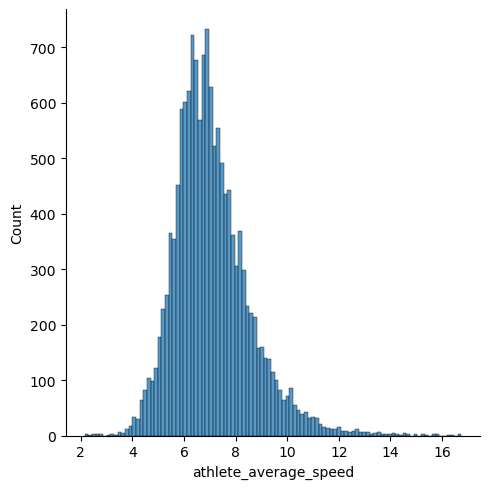

In [102]:
sns.displot(df[df['race_length'] == '50mi']['athlete_average_speed'])

In [63]:
# we can see that the majority is arround 6-8 km/h
# there are some outliers ultrapassing 20 km/h what we know it's impossible, because the world record for this distance lies between 16-17km/h

In [101]:
# removing those outliers in miles
indexNames = df[(df['race_length'] == '50mi') & (df['athlete_average_speed'] > 17)].index
df.drop(indexNames, inplace=True)

In [93]:
# violin plot to compare female x male average speed in both 50 miles and 50 km races

<Axes: xlabel='race_length', ylabel='athlete_average_speed'>

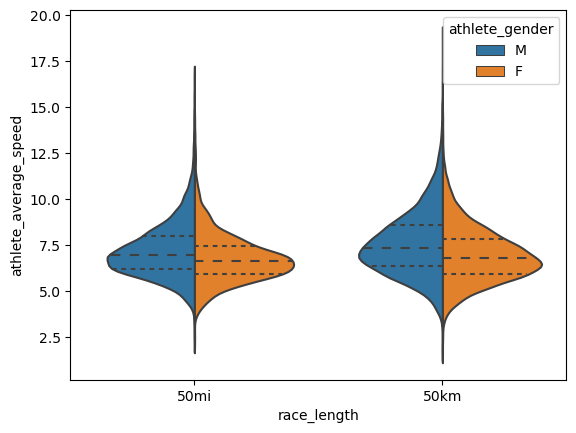

In [100]:
sns.violinplot(data = df, x = 'race_length', y = 'athlete_average_speed', hue = 'athlete_gender', split = True, inner = 'quarts', linewith = -1)

In [99]:
# we can see that in smaller distances men tend to run faster than women
# we can analyse that in greater distances women tend to have closer performance to men

In [ ]:
# scatter plot, to see how age correlates to the athlete average speed

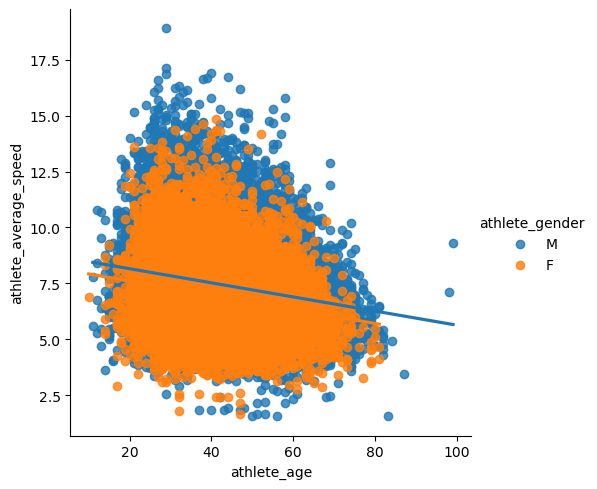

In [108]:
sns.lmplot(data=df, x='athlete_age', y='athlete_average_speed', hue='athlete_gender')

In [107]:
# notice that there is a correlation between age and average speed, 20-40 years old seem to have the fastest runners
# see that there are some athletes in their 80's, 90's running ultramaratons
# can't tell if it's a mistake because we've seen old people participating this type of race

In [110]:
# more questions to find out from the data:

In [111]:
# Difference in speed for the 50k, 50mi, male to female  

In [114]:
df.groupby(['race_length', 'athlete_gender'])['athlete_average_speed'].mean()

race_length  athlete_gender
50km         F                 6.966948
             M                 7.562757
50mi         F                 6.779096
             M                 7.214038
Name: athlete_average_speed, dtype: float64

In [138]:
# What age groups are the fastest in the 50 miles race (19+ yo) (top 15)

In [142]:
df.query('race_length == "50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False).query('count>15').head(15)

,mean,count
athlete_age,,
19,7.781079,38
26,7.750676,262
20,7.633224,67
32,7.560600,418
24,7.526565,186
25,7.477597,206
28,7.428883,325
31,7.424462,394
27,7.418414,256


In [132]:
# What age groups have the slowest performance (top 20)

In [131]:
df.query('race_length == "50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=True).query('count>0').head(20)

,mean,count
athlete_age,,
87,3.453000,1
82,4.774000,1
78,4.935000,1
80,5.076667,3
79,5.244000,3
81,5.320000,4
74,5.426800,10
13,5.439000,1
73,5.486500,16


In [143]:
# difference in performance in different seasons

In [180]:
df['race_month'] = df['race_date'].str.split('.').str.get(-2).astype(int)
df['race_season'] = df['race_month'].apply( lambda x: 'winter' if x > 11 
                                           else 'fall' if x > 8 
                                           else 'summer' if x > 5 
                                           else 'spring' if x > 2 
                                           else 'winter')

In [197]:
df['race_season'] = df['race_season'].astype(str)
df['race_season'].value_counts()

race_season
spring    17796
fall      17769
summer    12431
winter     8810
Name: count, dtype: int64

In [202]:
df.groupby('race_season')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)

,mean,count
race_season,,
winter,7.726799,8810
spring,7.283188,17796
fall,7.279612,17769
summer,6.989620,12431


In [203]:
# The summer has the worst average perfomance, probably temperature makes the race tougher, decreasing the average performance.

In [204]:
# 50 miles only:

In [205]:
df.query('race_length == "50mi"').groupby('race_season')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)

,mean,count
race_season,,
winter,7.335837,1567
fall,7.301296,4600
spring,7.071688,4433
summer,6.722977,3680


In [206]:
# same conclusion

In [207]:
# saving cleaned csv:
df.to_csv('ultramarathon_data_cleaned.csv')